# Apeksha Hada, ahada2

1. As per the data preprocessing step convert all the variables in the dataset into Numerical values as the algorithms only work with Numerical values 

2. Then Apply both algorithms one after the other then plot the ouput clusters

3. Compare the output clusters in both the steps.


## Bank Marketing Data Set 

URL: https://dataminingcsc6740.s3-us-west-2.amazonaws.com/datasets/homework_2.csv

### Files Information:

the homework_2.csv has all the informatiom.

### Relevant Information:

   The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

   There are two datasets: 
      1) The csv file has 4521 data points in it.
      2) Number of Attributes: 16 + output attribute.

### Attribute information:

   Input variables:
   #### bank client data:
   
   1 - age (numeric)
   
   2 - job : type of job (categorical: 
   "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
                                       
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
   
   #### related with the last contact of the current campaign:
   
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
  
   #### other attributes:
   
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
  


  Output variable (desired target):
  
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [1]:
#### Load Dataset with ";" delimiter

import pandas as pd
df = pd.read_csv('homework_2.csv',delimiter=";")
df.head()



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Data Preprocessing

In [2]:
# Convert dataset to string

from sklearn import decomposition
from sklearn.preprocessing import LabelEncoder

#print(pd.to_numeric(df.job, errors='coerce').notnull())
#df = df.dropna(subset=['job'])
#df.job = df.job. astype(int)

#df.dtypes
#cols = df.columns[df.dtypes.eq('object')]
#cols
#pd.to_numeric(df.job, errors='coerce').notnull()

#df['job'] = df['job'].astype(str).astype(int)

number = LabelEncoder()
df['job'] = number.fit_transform(df['job'].astype(str))
df['marital'] = number.fit_transform(df['marital'].astype(str))
df['education'] = number.fit_transform(df['education'].astype(str))
df['default'] = df['default'].map({'yes': 1, 'no': 0})
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})
df['contact'] = number.fit_transform(df['contact'].astype(str))
df['month'] = number.fit_transform(df['month'].astype(str))
df['poutcome'] = number.fit_transform(df['poutcome'].astype(str))
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [3]:
# Standardize the Data
#Standardize the Data: Standardization removes the mean and scale the data with standard deviation. 
#PCA seeks the direction that maximises the variance and scaling the data differently changes the PCA vectors.

from sklearn.preprocessing import StandardScaler
features = ['age','job', 'marital', 'education', 'default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']

# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['y']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

print(x)
#scaled_features_df = pd.DataFrame(x, index=df.index, columns=df.columns)


[[-1.05626965  1.71680374 -0.24642938 ... -0.4072183  -0.32041282
   0.44441328]
 [-0.77258281  0.79524562 -0.24642938 ...  2.98904408  2.04173372
  -2.57996071]
 [-0.58345826 -0.12631251  1.42139579 ...  2.89914302  0.27012381
  -2.57996071]
 ...
 [ 1.49691189  1.4096177  -0.24642938 ... -0.4072183  -0.32041282
   0.44441328]
 [-1.24539421 -1.04787063 -0.24642938 ...  1.71045119  1.45119709
  -1.57183605]
 [ 0.26760226 -0.74068459  1.42139579 ...  2.09003345  3.81334363
  -1.57183605]]


# PCA Algorithm along with plots and Results Explaination.

In [4]:
# PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
print(principalComponents)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf

[[-0.55870884  0.21547893]
 [ 4.50002086 -1.09038566]
 [ 3.72522469  0.99576633]
 ...
 [-0.90091062  2.52011841]
 [ 2.79081017  0.56276691]
 [ 4.43346034  0.4078208 ]]


,principal component 1,principal component 2
0,-0.558709,0.215479
1,4.500021,-1.090386
2,3.725225,0.995766
3,-0.896968,-1.233342
4,-0.860458,-2.160512
...,...,...
4516,-0.643908,0.479013
4517,-1.237738,-1.789258
4518,-0.900911,2.520118
4519,2.790810,0.562767


In [5]:
# Concatenating DataFrame along axis = 1. finalDf is the final DataFrame before plotting the data.

finalDf = pd.concat([principalDf, df[['y']]], axis = 1)
#finalDf['principal component 1']
finalDf

,principal component 1,principal component 2,y
0,-0.558709,0.215479,0
1,4.500021,-1.090386,0
2,3.725225,0.995766,0
3,-0.896968,-1.233342,0
4,-0.860458,-2.160512,0
...,...,...,...
4516,-0.643908,0.479013,0
4517,-1.237738,-1.789258,0
4518,-0.900911,2.520118,0
4519,2.790810,0.562767,0


array([0.15900587, 0.10569675])

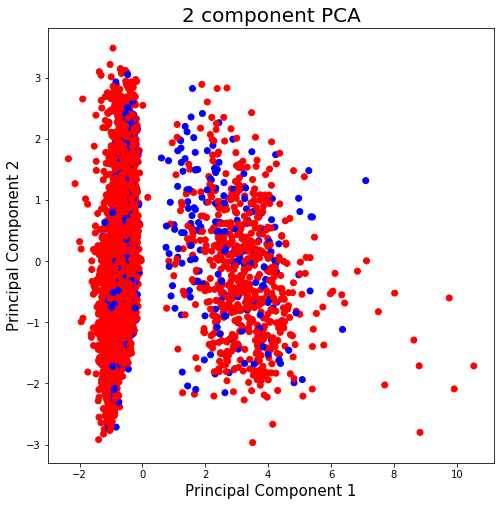

In [7]:
# Plot PCA

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

#y : has the client subscribed a term deposit? (binary: "yes","no")
# Colors based on value of y.

LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'b',
                   }

label_color = [LABEL_COLOR_MAP[l] for l in finalDf['y']]
ax.scatter(finalDf['principal component 1']
             , finalDf['principal component 2']
             , c=label_color)

pca.explained_variance_ratio_


# K-Means Algorithm with plots and Results Explination.

In [8]:
# k-means

from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=2)  # 2 clusters because we can see data divided into 2 parts in the above graph

#Using k-means on pca we got in prior steps
print(kmean.fit(principalComponents))


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [9]:
kmean.cluster_centers_

array([[-0.67596875,  0.03563443],
       [ 3.26732765, -0.17224074]])

In [10]:
kmean.labels_

array([0, 1, 1, ..., 0, 1, 1], dtype=int32)

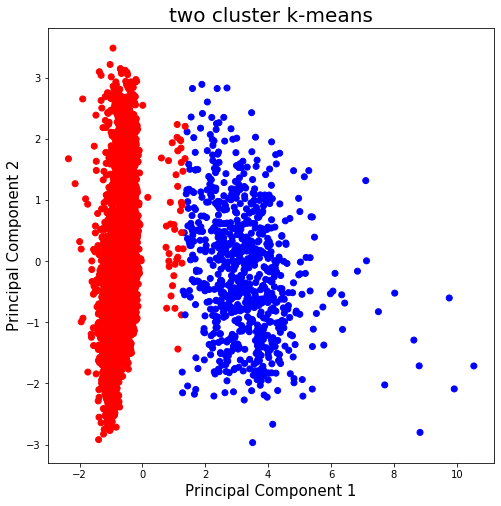

In [11]:
# Plot k-means

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('two cluster k-means', fontsize = 20)

LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'b',
                   }

#labels=np.array([kmean.labels_])

#print('lables:', labels)
#print(LABEL_COLOR_MAP[0])



#for l in kmean.labels_:
#    print('l=',l)
    #print(LABEL_COLOR_MAP[l])

label_color = [LABEL_COLOR_MAP[l] for l in kmean.labels_]
ax.scatter(finalDf['principal component 1']
             , finalDf['principal component 2']
             , c=label_color  
              )

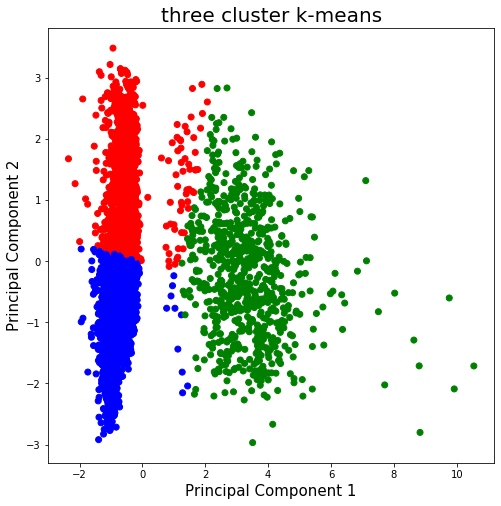

In [13]:
# 3 clusters

kmean3 = KMeans(n_clusters=3)
kmean3.fit(principalComponents)
# Plot k-means


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('three cluster k-means', fontsize = 20)

LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'b',
                   2 : 'g'
                   }

#labels=np.array([kmean.labels_])

#print('lables:', labels)
#print(LABEL_COLOR_MAP[0])



#for l in kmean.labels_:
#    print('l=',l)
    #print(LABEL_COLOR_MAP[l])

label_color = [LABEL_COLOR_MAP[l] for l in kmean3.labels_]
ax.scatter(finalDf['principal component 1']
             , finalDf['principal component 2']
             , c=label_color  
              )

# Comparing the results between PCA and K-Means and whats the inference from ouputs of the algorithms.

If we plot PCA and give colors based on values of y (0:red ; 1:blue), it looks exactly same as when we plot k-means and assign colors based on values of clusters (cluster0:red ; cluster1:blue)